In [2]:
from cobra import Reaction, Metabolite
from cobra.io import read_sbml_model
model_LB_vio_fad=read_sbml_model('Models/model_VN_LB_vio-fad.xml')

In [3]:
from cobra.flux_analysis.phenotype_phase_plane import production_envelope

In [4]:
from cobra.util.solver import linear_reaction_coefficients
linear_reaction_coefficients(model_LB_vio_fad)

{<Reaction Growth at 0x7fac7321deb0>: 1.0}

Analysis of Ex_glc in LB media with FAD as a cofactor

In [39]:
ppp_succ_LB = production_envelope(model_LB_vio_fad,
                    reactions=[model_LB_vio_fad.reactions.EX_glc__D_e],
                    objective=model_LB_vio_fad.reactions.Growth)

In [40]:
ppp_succ_LB

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc__D_e
0,"EX_adn_e, EX_arg__L_e, EX_asp__L_e, EX_cmp_e, ...",0.0,0.0,NaN,2.840597,2.117921,NaN,-10.000000
1,"EX_adn_e, EX_arg__L_e, EX_asp__L_e, EX_cmp_e, ...",0.0,0.0,NaN,2.822596,2.120625,NaN,-9.473684
2,"EX_adn_e, EX_arg__L_e, EX_asp__L_e, EX_cmp_e, ...",0.0,0.0,NaN,2.804596,2.123371,NaN,-8.947368
3,"EX_adn_e, EX_arg__L_e, EX_asp__L_e, EX_cmp_e, ...",0.0,0.0,NaN,2.786595,2.126159,NaN,-8.421053
4,"EX_adn_e, EX_arg__L_e, EX_asp__L_e, EX_cmp_e, ...",0.0,0.0,NaN,2.768595,2.128991,NaN,-7.894737
5,"EX_adn_e, EX_arg__L_e, EX_asp__L_e, EX_cmp_e, ...",0.0,0.0,NaN,2.750594,2.131868,NaN,-7.368421
6,"EX_adn_e, EX_arg__L_e, EX_asp__L_e, EX_cmp_e, ...",0.0,0.0,NaN,2.732585,2.134495,NaN,-6.842105
7,"EX_adn_e, EX_arg__L_e, EX_asp__L_e, EX_cmp_e, ...",0.0,0.0,NaN,2.714374,2.130138,NaN,-6.315789
8,"EX_adn_e, EX_arg__L_e, EX_asp__L_e, EX_cmp_e, ...",0.0,0.0,NaN,2.696164,2.125741,NaN,-5.789474
9,"EX_adn_e, EX_arg__L_e, EX_asp__L_e, EX_cmp_e, ...",0.0,0.0,NaN,2.677953,2.121302,NaN,-5.263158


In [5]:
ppp_succ_LB = production_envelope(model_LB_vio_fad,
                    reactions=[model_LB_vio_fad.reactions.Growth],
                    objective=model_LB_vio_fad.reactions.Violacein)

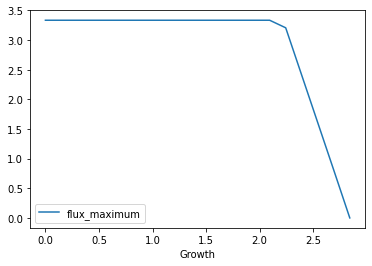

In [8]:
ppp_succ_LB.plot(x='Growth', y='flux_maximum')

In [6]:
ppp_succ_LB.plot(x='EX_glc__D_e', y='flux_maximum')

KeyError: 'EX_glc__D_e'

Optimal O2 uptake rate in LB media with FAD as a cofactor

In [25]:
model_LB_vio_fad.reactions.EX_o2_e.bounds = -1000, 0
ppp_o2_LB = production_envelope(model_LB_vio_fad,
                    reactions=[model_LB_vio_fad.reactions.EX_o2_e],
                    objective=model_LB_vio_fad.reactions.Violacein)

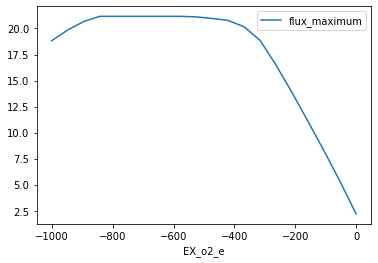

In [28]:
model_LB_vio_fad.reactions.EX_o2_e.bounds = -1000, 0
ppp_o2X = production_envelope(model_LB_vio_fad,
                        reactions=[model_LB_vio_fad.reactions.EX_o2_e],
                        objective=model_LB_vio_fad.reactions.Growth)
ppp_o2X.plot(x='EX_o2_e', y='flux_maximum')

In [26]:
ppp_o2_LB.EX_o2_e[ppp_o2_LB.flux_maximum.idxmax()]

-578.9473684210527

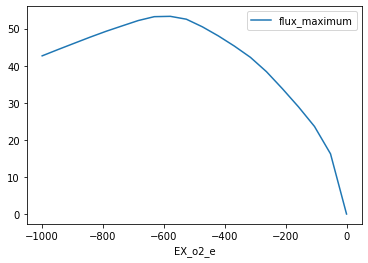

In [27]:
ppp_o2_LB.plot(x='EX_o2_e', y='flux_maximum')

Analysis of Ex_glc in M9 media with FAD as a cofactor

In [45]:
model_M9_vio_fad=read_sbml_model('Models/model_VN_M9_vio-fad.xml')

In [46]:
ppp_succ_M9 = production_envelope(model_M9_vio_fad,
                    reactions=[model_M9_vio_fad.reactions.EX_glc__D_e],
                    objective=model_M9_vio_fad.reactions.Growth)

In [47]:
ppp_succ_M9

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc__D_e
0,EX_glc__D_e,0.0,0.0,NaN,0.718858,6.974898,NaN,-10.000000
1,EX_glc__D_e,0.0,0.0,NaN,0.703304,7.203100,NaN,-9.473684
2,EX_glc__D_e,0.0,0.0,NaN,0.684296,7.420681,NaN,-8.947368
3,EX_glc__D_e,0.0,0.0,NaN,0.665288,7.665461,NaN,-8.421053
4,EX_glc__D_e,0.0,0.0,NaN,0.646280,7.942878,NaN,-7.894737
5,EX_glc__D_e,0.0,0.0,NaN,0.627271,8.259925,NaN,-7.368421
6,EX_glc__D_e,0.0,0.0,NaN,0.608263,8.625749,NaN,-6.842105
7,EX_glc__D_e,0.0,0.0,NaN,0.589255,9.052544,NaN,-6.315789
8,EX_glc__D_e,0.0,0.0,NaN,0.570247,9.556938,NaN,-5.789474
9,EX_glc__D_e,0.0,0.0,NaN,0.527967,9.733200,NaN,-5.263158


<AxesSubplot:xlabel='EX_glc__D_e'>

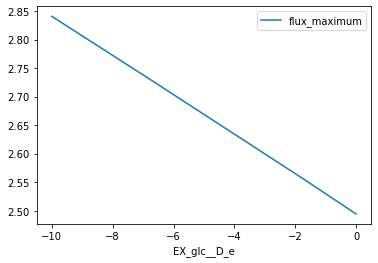

In [48]:
ppp_succ_LB.plot(x='EX_glc__D_e', y='flux_maximum')

Optimal O2 uptake rate in M9 media with FAD as a cofactor

In [49]:
ppp_o2_M9 = production_envelope(model_M9_vio_fad,
                    reactions=[model_M9_vio_fad.reactions.EX_o2_e],
                    objective=model_M9_vio_fad.reactions.Growth)

In [ ]:
ppp_o2_LB.EX_o2_e[ppp_o2.flux_maximum.idxmax()]